In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk
import importlib

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=1).download().PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc = lc.append(lk.search_lightcurvefile(kic, quarter=q).download().PDCSAP_FLUX.normalize().flatten(window_length=401))
lc = lc.remove_outliers(4)
pg = lc.to_periodogram(normalization='psd', minimum_frequency=150.0).flatten()

In [4]:
star = pb.jar.star(kic, pg.frequency.value, pg.power.value, 
                   numax, dnu, teff, bp_rp, 
                   store_chains=True, 
                   nthreads=4)

In [5]:
star.run_epsilon()

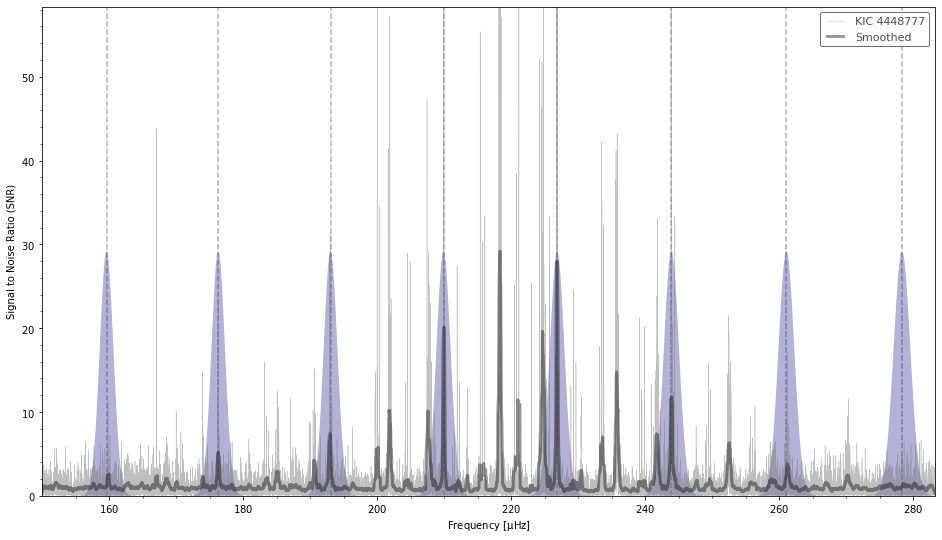

In [6]:
star.epsilon.plot(pg)

In [7]:
star.run_asy_peakbag(norders=7)

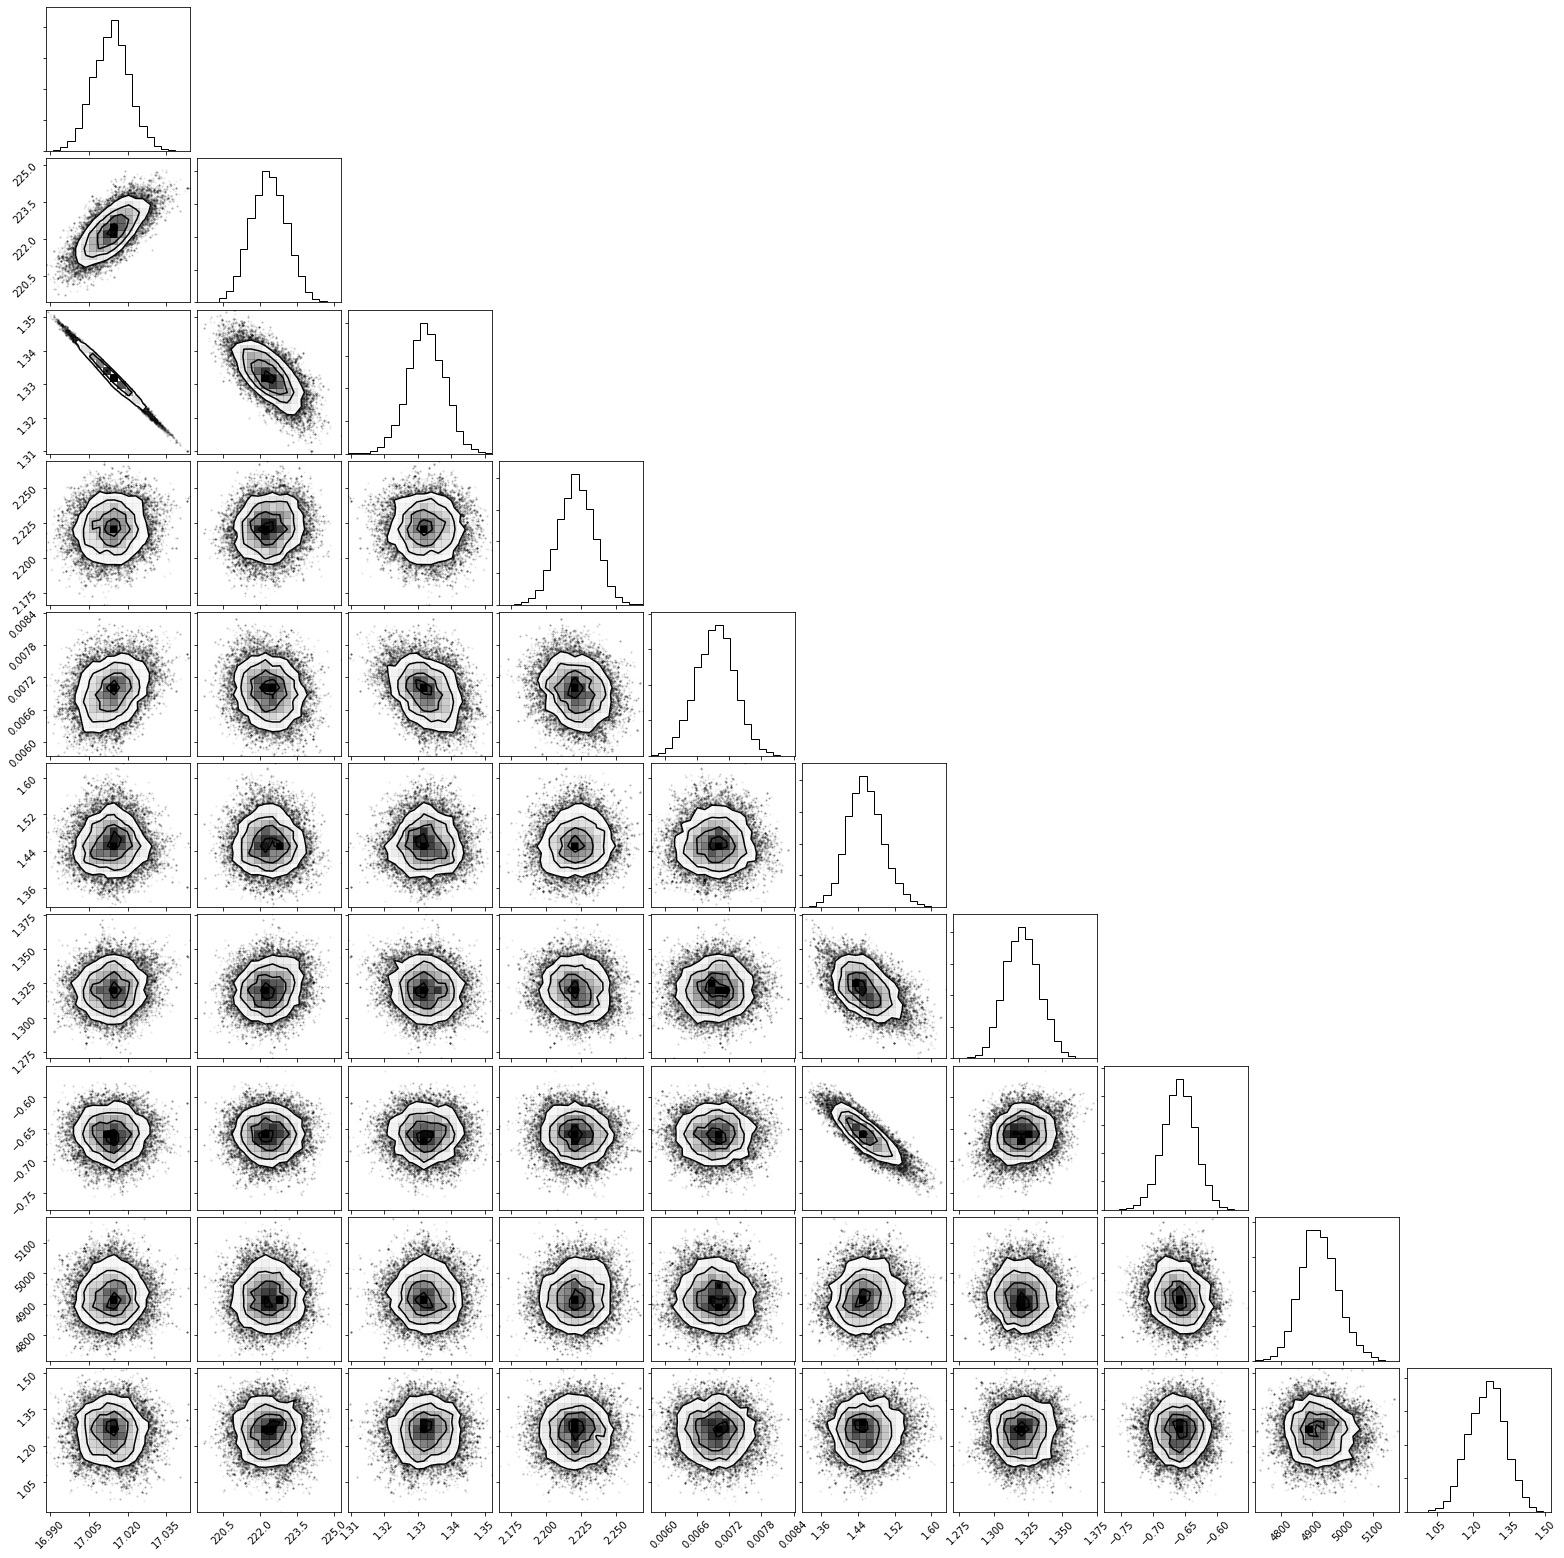

In [8]:
import corner
corner.corner(star.asy_fit.flatchain);

In [10]:
import pbjam
star.peakbag = pbjam.peakbag(star.f, star.s, star.asy_result)

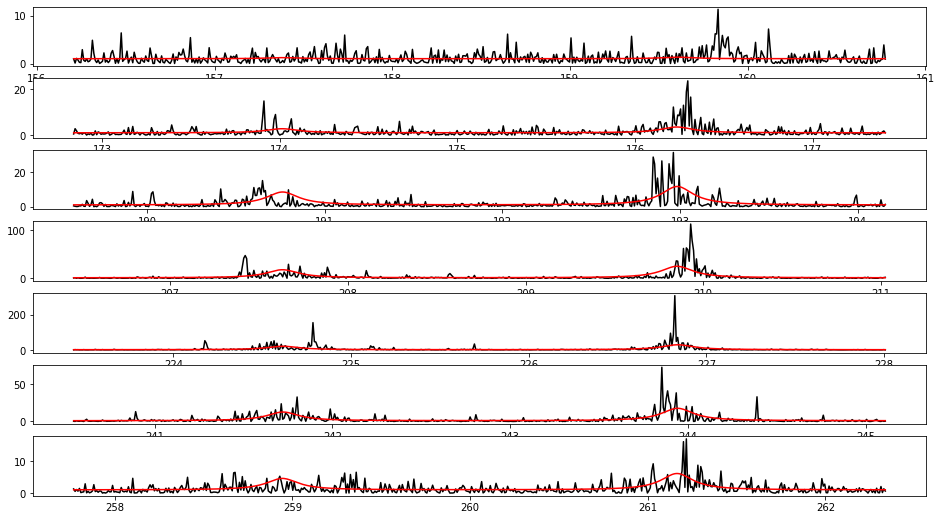

In [11]:
star.peakbag.plot_start_model()

In [12]:
star.run_peakbag()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [back, height2, height0, width2, width0, l2, l0]
100%|██████████| 2000/2000 [04:56<00:00,  7.14it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


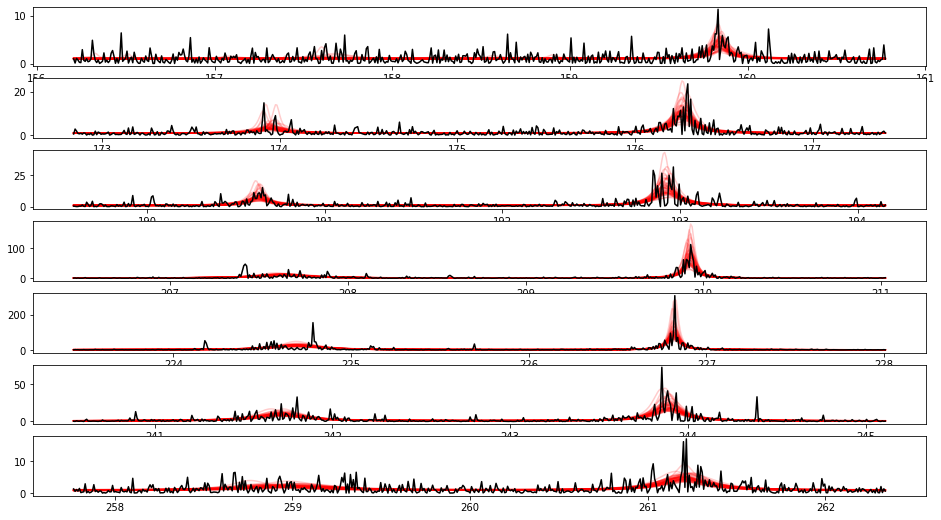

In [13]:
star.peakbag.plot_fit(thin=10)